IMPORTANT LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


IMPORTING DATASET

In [3]:
df = pd.read_csv('./voice.csv')

DATA EXPLORATION

In [4]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3169 non-null   float64
 1   sd        3169 non-null   float64
 2   median    3169 non-null   float64
 3   Q25       3169 non-null   float64
 4   Q75       3169 non-null   float64
 5   IQR       3169 non-null   float64
 6   skew      3169 non-null   float64
 7   kurt      3169 non-null   float64
 8   sp.ent    3169 non-null   float64
 9   sfm       3169 non-null   float64
 10  mode      3169 non-null   float64
 11  centroid  3169 non-null   float64
 12  meanfun   3169 non-null   float64
 13  minfun    3169 non-null   float64
 14  maxfun    3169 non-null   float64
 15  meandom   3169 non-null   float64
 16  mindom    3169 non-null   float64
 17  maxdom    3169 non-null   float64
 18  dfrange   3169 non-null   float64
 19  modindx   3169 non-null   float64
 20  label     3169 non-null   obje

In [7]:
df.shape

(3169, 21)

In [8]:
df.label

0         male
1         male
2         male
3         male
4         male
         ...  
3164    female
3165    female
3166    female
3167    female
3168      male
Name: label, Length: 3169, dtype: object

ENCODING TARGET VALUES (1: MALE, 0: FEMALE)

In [9]:
encoding_columns = [ "label"]
Encoder = LabelEncoder()
for column in encoding_columns :
    print("column",column )
    df[ column ] = Encoder.fit_transform(tuple(df[ column ]))

column label


In [10]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,0


FEATURE SELECTION

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

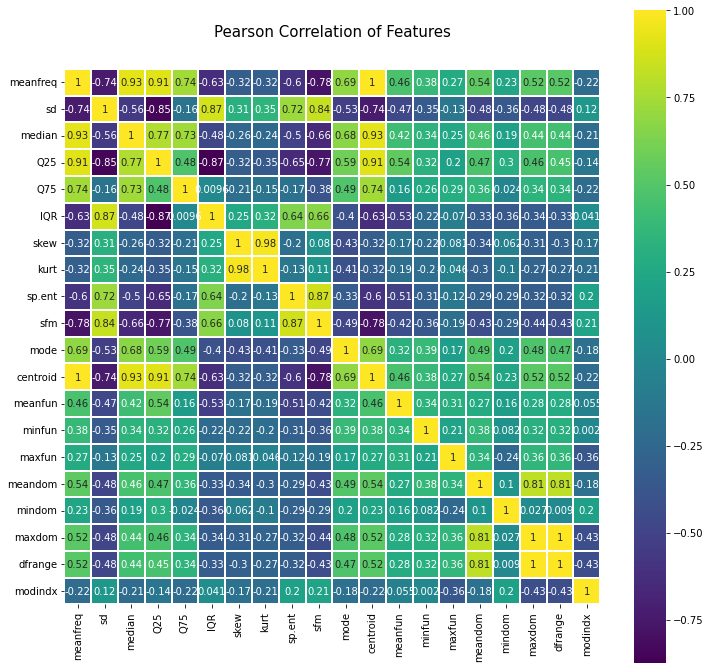

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [12]:
#While looking at the plot, we can figure out some interesting correlations.
#If you look at meanfreq vs centroid their correlation is maximum possible value of 1. 
#Same is the case with maxdom and dfrange.
#So essentially we could filter out these features and still get an equivalent performance as they aren't adding any new information.

In [13]:
df = df.drop('centroid',axis=1)

In [14]:
df = df.drop('maxdom',axis=1)

In [15]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.585938,0.311002,0
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,0.267702,0.185607,0.062257,0.271186,0.227022,0.007812,0.546875,0.350000,0


SPLITTING DATA INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT

In [16]:
x = df.drop("label",axis=1)
y = df["label"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [18]:
X_test.shape

(951, 18)

In [19]:
X_train

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx
1857,0.182064,0.059175,0.184107,0.167771,0.213676,0.045904,2.831543,14.277923,0.908296,0.451007,0.000000,0.169674,0.016512,0.275862,0.128125,0.007812,0.414062,0.142138
1694,0.093453,0.077777,0.066441,0.026102,0.157797,0.131695,2.314418,8.883277,0.952193,0.714591,0.012161,0.168044,0.059925,0.242424,0.623698,0.007812,3.289062,0.262400
738,0.159195,0.058804,0.168406,0.101159,0.199130,0.097971,1.641321,6.281878,0.935981,0.537197,0.097101,0.107602,0.016113,0.275862,1.011719,0.007812,3.656250,0.405641
2854,0.235183,0.036335,0.240000,0.225794,0.256449,0.030654,2.372058,8.529318,0.822157,0.190324,0.238131,0.181767,0.047013,0.275862,1.352742,0.234375,5.976562,0.114624
1877,0.183433,0.049427,0.173186,0.151098,0.212774,0.061677,2.549621,12.715922,0.907480,0.306337,0.154085,0.146007,0.016310,0.275862,0.871652,0.007812,6.843750,0.076484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.194937,0.034404,0.194902,0.181863,0.208971,0.027108,3.031623,13.742295,0.848110,0.254253,0.197647,0.169901,0.051064,0.279070,2.174665,0.023438,13.242188,0.106637
2347,0.225288,0.034083,0.228538,0.212735,0.247178,0.034443,2.113890,7.525178,0.846499,0.203654,0.215166,0.166322,0.047666,0.271186,1.545410,0.023438,10.101562,0.139000
1608,0.122706,0.085216,0.145739,0.032031,0.199123,0.167092,1.483382,4.788478,0.941022,0.620471,0.193518,0.187219,0.032787,0.238806,0.610609,0.015625,3.757812,0.190460
2541,0.197540,0.034775,0.198684,0.182661,0.218712,0.036052,2.459397,9.567449,0.839523,0.226977,0.185064,0.173636,0.047013,0.271186,1.614746,0.210938,15.023438,0.038962


In [20]:
y_train

1857    0
1694    0
738     1
2854    0
1877    0
       ..
2514    0
2347    0
1608    0
2541    0
2575    0
Name: label, Length: 2218, dtype: int64

TRAINING MACHINE LEARNING MODEL

In [21]:
cat = CatBoostClassifier()
randomforest =RandomForestClassifier()
xgb = XGBClassifier()
lgr = LogisticRegression()


In [22]:
estimator = []
estimator.append(('catboost',cat))
estimator.append(('randomforest',randomforest))
estimator.append(('xgb',xgb))
estimator.append(('lgr',lgr))

In [23]:
voting = VotingClassifier(estimators= estimator,voting ='soft')
voting.fit(X_train,y_train)

Learning rate set to 0.014476
0:	learn: 0.6624166	total: 49ms	remaining: 48.9s
1:	learn: 0.6377940	total: 50.3ms	remaining: 25.1s
2:	learn: 0.6104332	total: 51.6ms	remaining: 17.1s
3:	learn: 0.5876607	total: 52.9ms	remaining: 13.2s
4:	learn: 0.5653148	total: 54.2ms	remaining: 10.8s
5:	learn: 0.5433303	total: 55.5ms	remaining: 9.2s
6:	learn: 0.5244146	total: 56.8ms	remaining: 8.06s
7:	learn: 0.5031007	total: 58.3ms	remaining: 7.22s
8:	learn: 0.4852025	total: 59.5ms	remaining: 6.56s
9:	learn: 0.4678589	total: 60.9ms	remaining: 6.03s
10:	learn: 0.4497877	total: 62.3ms	remaining: 5.6s
11:	learn: 0.4367362	total: 63.7ms	remaining: 5.25s
12:	learn: 0.4240067	total: 66.9ms	remaining: 5.08s
13:	learn: 0.4086191	total: 68.4ms	remaining: 4.82s
14:	learn: 0.3922846	total: 70.1ms	remaining: 4.6s
15:	learn: 0.3779165	total: 71.7ms	remaining: 4.41s
16:	learn: 0.3641976	total: 73.1ms	remaining: 4.23s
17:	learn: 0.3543670	total: 74.4ms	remaining: 4.06s
18:	learn: 0.3447745	total: 75.6ms	remaining: 3.9

/home/sparsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f553d3e8eb0>),
                             ('randomforest', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=No...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat

EVALUATING TRAINED MACHINE LEARNING MODEL

In [24]:
y_pred = voting.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.9768664563617245

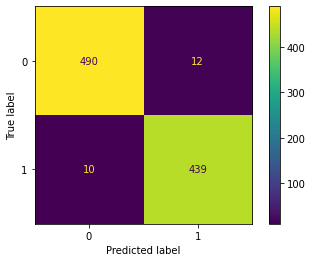

In [28]:
t = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= t, display_labels= voting.classes_)
disp.plot()

EXPORTING TRAINED ML MODEL FOR FRONT_END

In [29]:
import pickle

In [30]:
file_name = 'finalized_model.sav'
pickle.dump(voting, open(file_name,'wb'))

In [31]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

RECORDING VOICE AND RECOGNISING GENDER IN REAL-TIME

In [33]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io import wavfile
import numpy as np

In [34]:
fs = 44100  # Sample rate
seconds = 3  # Duration of recording

In [72]:
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
print("Speak Now")
sd.wait()  # Wait until recording is finished
print("Recording Done!")
write('output.wav', fs, myrecording)  # Save as WAV file 

Speak Now
Recording Done!


In [73]:
import os

In [34]:
os.system('Rscript extractor_feature.r')

Warning message:
In (0:(n - 1)) * f : NAs produced by integer overflow


0

In [75]:
voice = pd.read_csv('my_voice.csv')

In [76]:
#columns_scaling = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"]
#voice[columns_scaling] = MinMaxScaler().fit_transform(voice[columns_scaling])

In [77]:
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.147568,0.05025,0.155185,0.143838,0.17087,0.027032,3.067424,13.020344,0.818423,0.250801,0,0.147568,0.136435,0.043109,0.277358,0.248611,0,4.005176,4.005176,0.038908


In [78]:
voice = voice.drop('centroid',axis=1)

In [79]:
voice = voice.drop('maxdom',axis=1)

In [80]:
type(voice)

pandas.core.frame.DataFrame

In [81]:
gender = voting.predict(voice)

In [82]:
if(gender[0] == 0):
    print("Female")
else:
    print("Male")

Male


In [1]:
from tkinter import *
from tkinter.ttk import *
from tkinter.filedialog import askopenfile

root = Tk()

root.title('Major Project')

#width x height
root.geometry("1280x720")

#width,height
root.minsize(1280,720)

root.maxsize(1920,1080)

photo1 = PhotoImage(file = "/home/sparsh/pyvscode/Resources/download.png")
photo1_label = Label(image=photo1)
photo1_label.pack()

Heading = Label(text = "Gender Recognition Using Voice\n",font=('Helvetica', 22, 'bold'))
Heading.pack(pady=70)

def record(event):
    import sounddevice as sd
    from scipy.io.wavfile import write
    from scipy.io import wavfile
    import numpy as np
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
    #print("Speak Now")
    for widgets in record_frame.winfo_children():
        widgets.destroy()
    Recording = Label(record_frame,text = "Recording...")
    Recording.pack()
    sd.wait()  # Wait until recording is finished
    for widgets in record_frame.winfo_children():
        widgets.destroy()
    Recorded = Label(record_frame,text = "Recording Done!")
    Recorded.pack()
    write('/home/sparsh/pyvscode/Major_Project/GenderPredict-main/output1.wav', fs, myrecording)  # Save as WAV file

Record_png = PhotoImage(file = "/home/sparsh/pyvscode/Resources/record.png")
Record_button = Button(root, text = 'Click Me !', image = Record_png)
Record_button.pack()
Record_button.bind('<Button-1>',record)

record_frame = Frame(root,borderwidth=6)
record_frame.pack()
record_text = Label(record_frame,text="Record")
record_text.pack()

def open_file():
    global file
    file = askopenfile(filetypes=[('Waveform Audio File', '*wav')])
    if file is not None:
        filepath = os.path.abspath(file.name)
        location = Label(root,text=str(filepath))
        location.pack()
        os.rename(str(filepath) , "/home/sparsh/pyvscode/Major_Project/GenderPredict-main/output.wav")

upload_label = Label(root,text = 'Upload audio in wav format')
upload_label.pack()
upload_button = Button(root,text = 'Choose File',command=lambda:open_file())
upload_button.pack()

#Important Label Options
#text - add the text
#bd - background
#fg - foreground
#padx - x padding
#pady - y padding
#relief - border styling - sunken , raised , groove , ridge
Footer_frame = Frame(root,borderwidth=2)
Footer_frame.pack()
Footer_text = Label(Footer_frame,text="                  By-:\nSparsh Saxena (2013662)\nShivani Deoli ()")
Footer_text.pack()
#Footer = Label(text = "By-:\nSparsh Saxena (2013662)\nShivani Deoli ()")
#Footer.pack()
quitting = Button(root, text = 'Quit Program', command=root.destroy)
quitting.pack()
root.mainloop()